In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
iris = sklearn.datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
type(iris['data'])

numpy.ndarray

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
%matplotlib inline

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

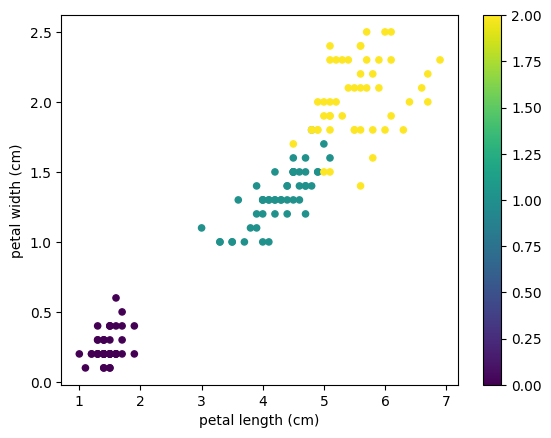

In [8]:
df_iris.plot.scatter(x='petal length (cm)', y='petal width (cm)', c=iris.target, colormap='viridis')

In [9]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [10]:
df_iris['class'] = iris.target_names[iris.target]
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
import seaborn as sns

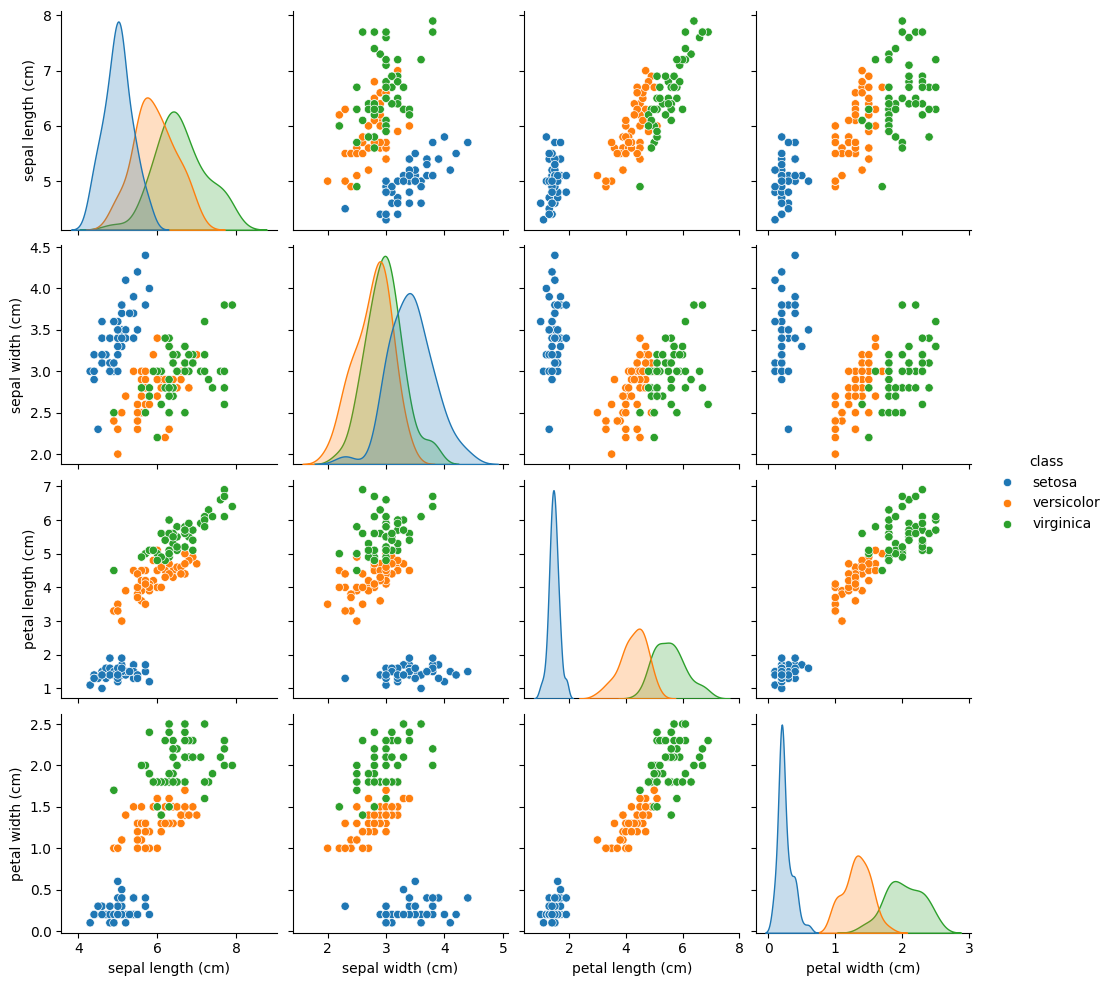

In [12]:
sns.pairplot(df_iris, hue="class")

<Axes: xlabel='class', ylabel='sepal length (cm)'>

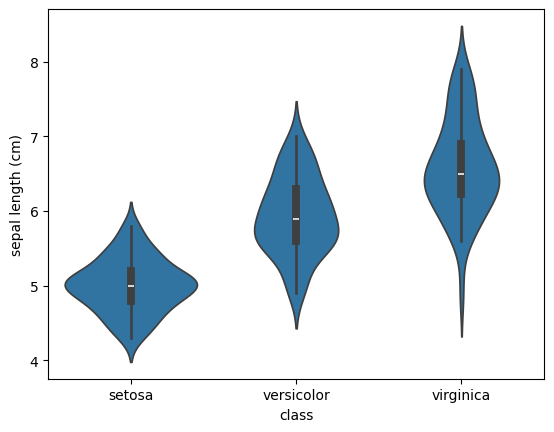

In [13]:
sns.violinplot(x='class', y='sepal length (cm)', data=df_iris)

In [14]:
# Place data and targets into variables for easier reference
X = iris.data
y = iris.target

In [15]:
# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

In [16]:
# Define the simplest neural network using nn.sequential
model = nn.Sequential(
    nn.Linear(4, 3)  # 4 input features --> 3 output classes
)

In [17]:
from torchsummary import summary
summary(model, (150, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 150, 3]              15
Total params: 15
Trainable params: 15
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [18]:
# Loss function (CrossEntropy for classification) and optimizer (SGD)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [19]:
# Training loop (200 epochs)
for epoch in range(200):
  optimizer.zero_grad()       # Reset gradients
  outputs = model(X_tensor)   # Forward pass
  loss = loss_fn(outputs, y_tensor)  # Calculate loss
  loss.backward()             # Backpropagation
  optimizer.step()            # Update weights
  if (epoch + 1) % 10 == 0:
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.7548
Epoch 20, Loss: 0.8194
Epoch 30, Loss: 0.7569
Epoch 40, Loss: 0.7113
Epoch 50, Loss: 0.6727
Epoch 60, Loss: 0.6376
Epoch 70, Loss: 0.6043
Epoch 80, Loss: 0.5720
Epoch 90, Loss: 0.5403
Epoch 100, Loss: 0.5090
Epoch 110, Loss: 0.4781
Epoch 120, Loss: 0.4477
Epoch 130, Loss: 0.4179
Epoch 140, Loss: 0.3890
Epoch 150, Loss: 0.3613
Epoch 160, Loss: 0.3355
Epoch 170, Loss: 0.3123
Epoch 180, Loss: 0.2930
Epoch 190, Loss: 0.2784
Epoch 200, Loss: 0.2685


In [20]:
# Print classifications from last 10 data items
# Max value = most likely class
model(X_tensor)[140:]

tensor([[-5.9085, -0.5491,  0.8071],
        [-4.7612, -0.3648, -0.0886],
        [-5.4599, -0.5240,  0.6900],
        [-6.2402, -0.6014,  0.8755],
        [-6.0062, -0.6399,  0.8384],
        [-5.1603, -0.4183,  0.2951],
        [-5.1343, -0.2999,  0.4006],
        [-5.0353, -0.4372,  0.0822],
        [-5.5005, -0.7200,  0.4942],
        [-5.0544, -0.5640,  0.1702]], grad_fn=<SliceBackward0>)

In [21]:
# Predictions (just for fun, since we trained on all data)
with torch.no_grad():
  outputs = model(X_tensor)
  # Always choose most likely class for predictions
  y_pred = torch.argmax(outputs, dim=1)
  # How many data items do we have (it is 150)
  total = y_tensor.size(0)
  # Count how many correct predictions compared to ground truth.
  # y_pred == y_tensor: boolean tensor with correct (true) and incorrect (false) predictions
  # sum(): how many true values (= correct predictions)
  # item(): extract single value from resulting tensor
  correct = (y_pred == y_tensor).sum().item()
  accuracy = correct / total
  # Shorter, but the same:
  # accuracy = (y_pred == y_tensor).float().mean().item()
  print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 0.98


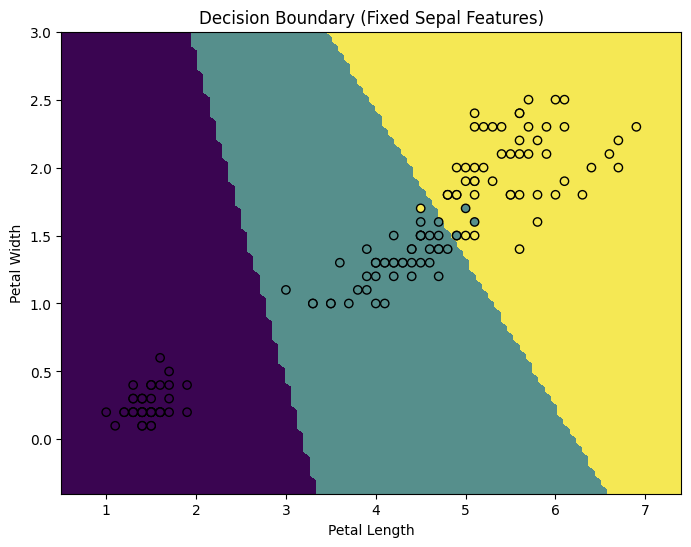

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Define a colormap with exactly three colors for the three classes
class_colors = ListedColormap(["#3a0551", "#568f8c", "#f5e854"])  # Ensure consistency

# Select two features to vary (e.g., Petal Length and Petal Width)
feature_x, feature_y = 2, 3  # Petal Length, Petal Width

# Fix the other two features at their mean value
fixed_values = X.mean(axis=0)
fixed_values_tensor = torch.tensor(fixed_values, dtype=torch.float32)

# Generate a grid of values for the selected features
x_min, x_max = X[:, feature_x].min() - 0.5, X[:, feature_x].max() + 0.5
y_min, y_max = X[:, feature_y].min() - 0.5, X[:, feature_y].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Create input tensor for the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Expand to full 4D space by copying fixed values for the other two features
full_grid = np.tile(fixed_values, (grid_points.shape[0], 1))
full_grid[:, feature_x] = grid_points[:, 0]  # Vary Petal Length
full_grid[:, feature_y] = grid_points[:, 1]  # Vary Petal Width

# Convert to tensor and predict classes
grid_tensor = torch.tensor(full_grid, dtype=torch.float32)
with torch.no_grad():
    Z = model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy()

# Reshape predictions to match grid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=1.0, cmap=class_colors)
plt.scatter(X[:, feature_x], X[:, feature_y], c=y, cmap=class_colors, edgecolors="k")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision Boundary (Fixed Sepal Features)")
plt.show()


In [23]:
# Create two new data points (flowers)
new_data = torch.tensor([[5.1, 3.5, 1.4, 0.2],  # Example 1: Features of a flower
                        [6.7, 3.0, 5.2, 2.3]], dtype=torch.float32) # Example 2: Features of another flower

# Make predictions using the trained model
with torch.no_grad():
    predictions = model(new_data)
    predicted_classes = torch.argmax(predictions, dim=1)

# Print the predicted classes
print("Predicted Classes:", predicted_classes.numpy())

# Assuming iris.target_names holds the class labels (e.g. ['setosa', 'versicolor', 'virginica'])
print("Predicted Flower Types:")
for i, pred_class in enumerate(predicted_classes):
  print(f"Flower {i+1}: {iris.target_names[pred_class]}")


Predicted Classes: [0 2]
Predicted Flower Types:
Flower 1: setosa
Flower 2: virginica


# Split Data & Better Neural Network

The following code uses the same dataset, but splits the dataset into train and test data and creates a slightly more complex neural network that yields better performance by incorporating non-linear decision boundaries.

In [24]:
# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [25]:
# Convert to PyTorch tensors. Specify dtype for CrossEntropyLoss
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [26]:
# Create a new model
model = nn.Sequential(
    nn.Linear(4, 8),
    nn.ReLU(),
    nn.Linear(8, 3)
)

In [27]:
# Use same loss, but different optimizer this time
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [28]:
# Training loop (200 epochs)
for epoch in range(200):
  optimizer.zero_grad()       # Reset gradients
  outputs = model(X_train_tensor)   # Forward pass
  loss = loss_fn(outputs, y_train_tensor)  # Calculate loss
  loss.backward()             # Backpropagation
  optimizer.step()            # Update weights
  if (epoch + 1) % 10 == 0:
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.3782
Epoch 20, Loss: 0.1396
Epoch 30, Loss: 0.0706
Epoch 40, Loss: 0.0536
Epoch 50, Loss: 0.0469
Epoch 60, Loss: 0.0429
Epoch 70, Loss: 0.0403
Epoch 80, Loss: 0.0384
Epoch 90, Loss: 0.0369
Epoch 100, Loss: 0.0357
Epoch 110, Loss: 0.0346
Epoch 120, Loss: 0.0337
Epoch 130, Loss: 0.0328
Epoch 140, Loss: 0.0320
Epoch 150, Loss: 0.0313
Epoch 160, Loss: 0.0306
Epoch 170, Loss: 0.0300
Epoch 180, Loss: 0.0294
Epoch 190, Loss: 0.0289
Epoch 200, Loss: 0.0284


In [29]:
# Predictions, now on separate test data
with torch.no_grad():
  y_pred = torch.argmax(model(X_test_tensor), dim=1)
  accuracy = (y_pred == y_test_tensor).float().mean().item()
  print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.93


In [30]:
# Print predicted classes
y_pred

tensor([0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0,
        0, 2, 1, 2, 2, 0])

In [31]:
# Print correct classes
y_test_tensor

tensor([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0,
        0, 2, 1, 2, 2, 0])

In [32]:
# Show probabilities of each class
# Each line sums up to 100%
# The softmax function performs this based on the raw logits otherwise created
with torch.no_grad():
    logits = model(X_tensor)  # Raw model outputs
    probabilities = torch.softmax(logits, dim=1)  # Convert logits to probabilities
    # Print probabilities with 4 decimal places
    for prob in probabilities[140:]:
        print([f'{p:.4f}' for p in prob.numpy()])

['0.0000', '0.0000', '1.0000']
['0.0000', '0.0003', '0.9997']
['0.0000', '0.0006', '0.9994']
['0.0000', '0.0000', '1.0000']
['0.0000', '0.0000', '1.0000']
['0.0000', '0.0000', '1.0000']
['0.0000', '0.0023', '0.9977']
['0.0000', '0.0032', '0.9968']
['0.0000', '0.0000', '1.0000']
['0.0000', '0.0236', '0.9764']


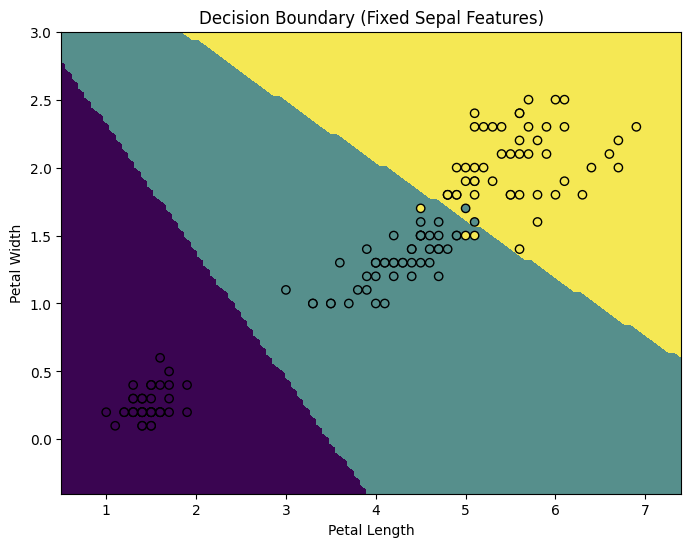

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Define a colormap with exactly three colors for the three classes
class_colors = ListedColormap(["#3a0551", "#568f8c", "#f5e854"])  # Ensure consistency

# Select two features to vary (e.g., Petal Length and Petal Width)
feature_x, feature_y = 2, 3  # Petal Length, Petal Width

# Fix the other two features at their mean value
fixed_values = X.mean(axis=0)
fixed_values_tensor = torch.tensor(fixed_values, dtype=torch.float32)

# Generate a grid of values for the selected features
x_min, x_max = X[:, feature_x].min() - 0.5, X[:, feature_x].max() + 0.5
y_min, y_max = X[:, feature_y].min() - 0.5, X[:, feature_y].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Create input tensor for the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Expand to full 4D space by copying fixed values for the other two features
full_grid = np.tile(fixed_values, (grid_points.shape[0], 1))
full_grid[:, feature_x] = grid_points[:, 0]  # Vary Petal Length
full_grid[:, feature_y] = grid_points[:, 1]  # Vary Petal Width

# Convert to tensor and predict classes
grid_tensor = torch.tensor(full_grid, dtype=torch.float32)
with torch.no_grad():
    Z = model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy()

# Reshape predictions to match grid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=1.0, cmap=class_colors)
plt.scatter(X[:, feature_x], X[:, feature_y], c=y, cmap=class_colors, edgecolors="k")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision Boundary (Fixed Sepal Features)")
plt.show()
